In [2]:
from pyspark.sql import SparkSession, Row
import pyspark.sql.functions as F

In [3]:
spark = (
    SparkSession
    .builder
    .master("local[*]")
    .getOrCreate()
)

21/08/12 09:34:37 WARN Utils: Your hostname, HF-LPT-1115A.local resolves to a loopback address: 127.0.0.1; using 10.97.130.191 instead (on interface en0)
21/08/12 09:34:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/08/12 09:34:37 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
df = (
    spark
    .read
    .option("header", True)
    .option("inferSchema", True)
    .csv("weather.csv")
).cache()

In [5]:
df.printSchema()

root
 |-- EST: string (nullable = true)
 |-- Max TemperatureF: integer (nullable = true)
 |-- Mean TemperatureF: integer (nullable = true)
 |-- Min TemperatureF: integer (nullable = true)
 |-- Max Dew PointF: integer (nullable = true)
 |-- MeanDew PointF: integer (nullable = true)
 |-- Min DewpointF: integer (nullable = true)
 |-- Max Humidity: integer (nullable = true)
 |--  Mean Humidity: integer (nullable = true)
 |--  Min Humidity: integer (nullable = true)
 |--  Max Sea Level PressureIn: double (nullable = true)
 |--  Mean Sea Level PressureIn: double (nullable = true)
 |--  Min Sea Level PressureIn: double (nullable = true)
 |--  Max VisibilityMiles: integer (nullable = true)
 |--  Mean VisibilityMiles: integer (nullable = true)
 |--  Min VisibilityMiles: integer (nullable = true)
 |--  Max Wind SpeedMPH: integer (nullable = true)
 |--  Mean Wind SpeedMPH: integer (nullable = true)
 |--  Max Gust SpeedMPH: integer (nullable = true)
 |-- PrecipitationIn: string (nullable = true)
 

In [6]:
df = df.withColumn("EST", F.to_date(F.col("EST"), "M/d/yyyy"))

<AxesSubplot:xlabel='EST'>

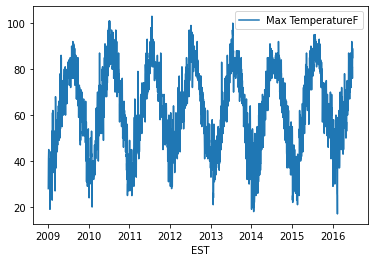

In [7]:
(
    df
    .select("EST", "Max TemperatureF")
    .toPandas()
    .plot(x="EST", y="Max TemperatureF")
)